In [3]:
from typing import Union
from datetime import datetime, date, time
from dateutil import parser
import earthaccess
import geopandas as gpd
from shapely.geometry.polygon import orient

import rasters as rt

from emit_tools import CMR_GRANULE_SEARCH_URL
from emit_tools import generate_CMR_daterange_string
from emit_tools import EMIT_L2A_REFLECTANCE_CONCEPT_ID

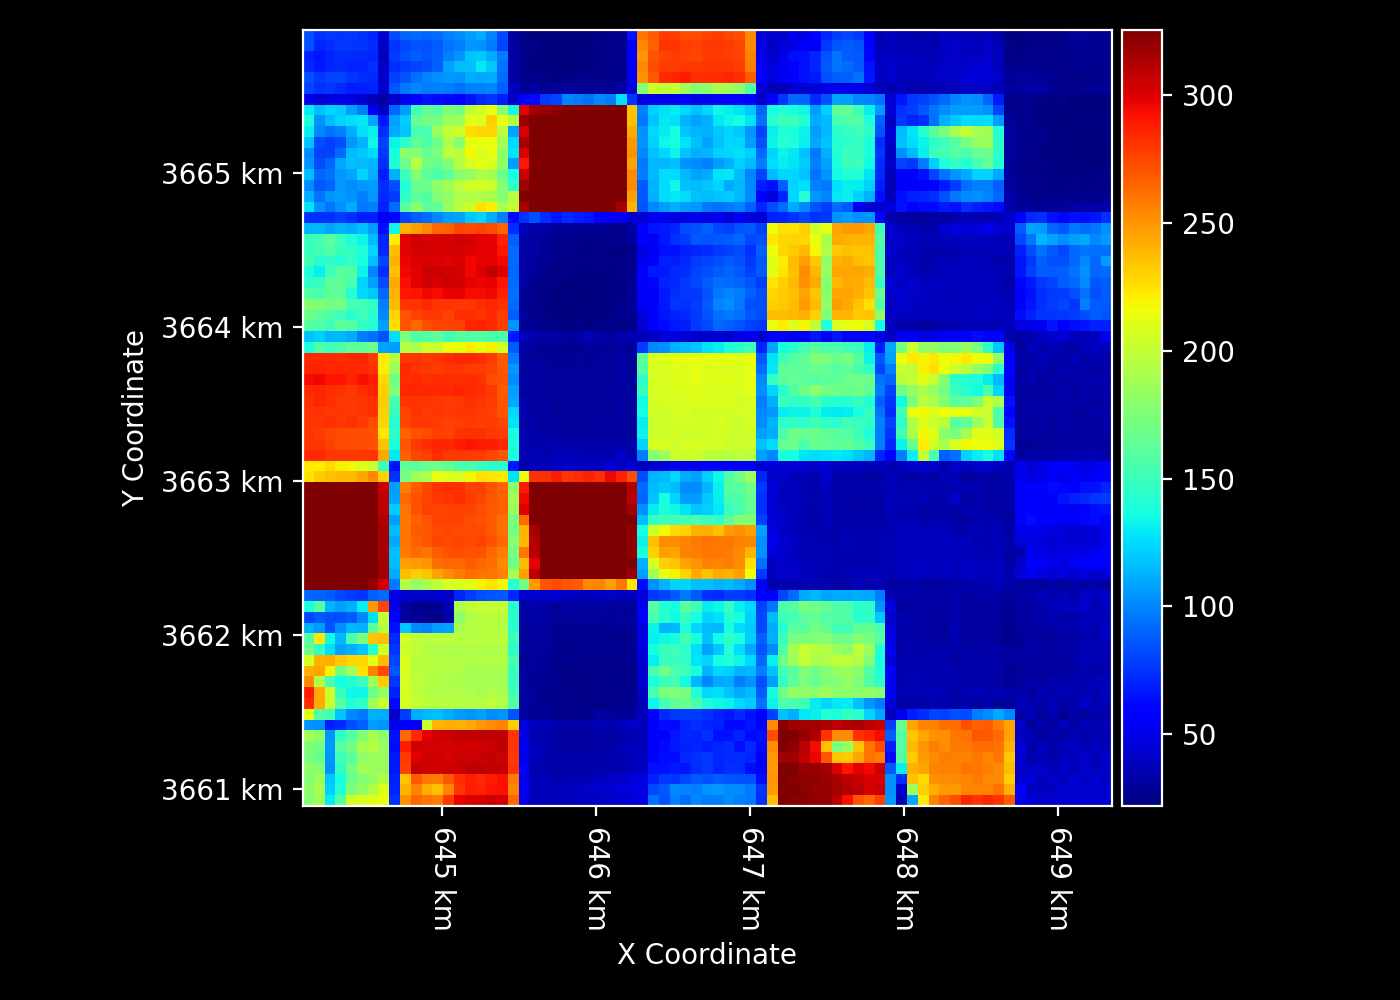

In [4]:
subset = rt.Raster.open("farms_subset.tif")
subset

In [5]:
# earthaccess.login(strategy="netrc")
earthaccess.login(strategy="netrc", persist=True)

In [6]:
# earthaccess.search_data(
#     short_name="EMITL2ARFL",
#     temporal=("2022-09-03", "2022-09-04"),
#     point=(-62.1123,-39.89402),
#     count=3
# )

In [10]:
from rasters import Point, Polygon, RasterGeometry

def spatially_constrain_earthaccess_query(
        query: earthaccess.search.DataGranules, 
        geometry: Union[Point, Polygon, RasterGeometry]) -> earthaccess.search.DataGranules:
    # Add spatial constraints to the query if provided
    if isinstance(geometry, Point):
        # If the target geometry is a Point, add a point constraint to the query
        query = query.point(geometry.x, geometry.y)
    
    if isinstance(geometry, Polygon):
        # If the target geometry is a Polygon, add a polygon constraint to the query
        ring = geometry.exterior
        
        # Ensure the ring is counter-clockwise
        if not ring.is_ccw:
            ring = ring.reverse()
        
        coordinates = ring.coords
        
        # Add the polygon coordinates to the query
        query = query.polygon(coordinates)
    
    if isinstance(geometry, RasterGeometry):
        # If the target geometry is a RasterGeometry, add a polygon constraint to the query
        ring = geometry.corner_polygon_latlon.exterior
        
        # Ensure the ring is counter-clockwise
        if not ring.is_ccw:
            ring = ring.reverse()
        
        coordinates = ring.coords
        
        # Add the polygon coordinates to the query
        query = query.polygon(coordinates)
    
    return query

In [104]:
generate_CMR_daterange_string("2024-01-01", "2024-12-31")

'2024-01-01T00:00:00Z,2024-12-31T23:59:59Z'

In [ ]:
# create blank query
query = earthaccess.granule_query()
# include concept ID in query
query = query.concept_id(EMIT_L2A_REFLECTANCE_CONCEPT_ID)
# include time range in query
query = query.temporal("2024-01-01T00:00:00Z", "2024-12-31T23:59:59Z")
# spatially constrain query
query = spatially_constrain_earthaccess_query(query, subset.geometry)
query.params

ParserError: Unknown string format: 2024-01-01T00:00:00Z,2024-12-31T23:59:59Z

In [8]:
type(query)

earthaccess.search.DataGranules

In [15]:
from typing import List

granules: List[earthaccess.search.DataGranule]
granules = query.get()
granules

[Collection: {'ShortName': 'EMITL2ARFL', 'Version': '001'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -115.26057434082031, 'Latitude': 34.029930114746094}, {'Longitude': -115.76715087890625, 'Latitude': 33.414642333984375}, {'Longitude': -115.09892272949219, 'Latitude': 32.86448669433594}, {'Longitude': -114.59234619140625, 'Latitude': 33.479774475097656}, {'Longitude': -115.26057434082031, 'Latitude': 34.029930114746094}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-02-18T20:09:35Z', 'EndingDateTime': '2024-02-18T20:09:47Z'}}
 Size(MB): 3579.5215587615967
 Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFL_001_20240218T200935_2404913_016.nc', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFLUNCERT_001_20240218T200

In [19]:
remote_granule = granules[0]
remote_granule

Collection: {'ShortName': 'EMITL2ARFL', 'Version': '001'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -115.26057434082031, 'Latitude': 34.029930114746094}, {'Longitude': -115.76715087890625, 'Latitude': 33.414642333984375}, {'Longitude': -115.09892272949219, 'Latitude': 32.86448669433594}, {'Longitude': -114.59234619140625, 'Latitude': 33.479774475097656}, {'Longitude': -115.26057434082031, 'Latitude': 34.029930114746094}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-02-18T20:09:35Z', 'EndingDateTime': '2024-02-18T20:09:47Z'}}
Size(MB): 3579.5215587615967
Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFL_001_20240218T200935_2404913_016.nc', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFLUNCERT_001_20240218T200935_2404913_016.nc', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_MASK_001_20240218T200935_2404913_016.nc']

In [20]:
type(remote_granule)

earthaccess.results.DataGranule

In [18]:
parent_directory = "~/data/EMIT_download"

In [30]:
from os.path import abspath, expanduser

earthaccess.download(remote_granule.data_links(), local_path=abspath(expanduser(parent_directory)))

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

['/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016.nc',
 '/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFLUNCERT_001_20240218T200935_2404913_016.nc',
 '/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_MASK_001_20240218T200935_2404913_016.nc']

In [23]:
remote_granule

Collection: {'ShortName': 'EMITL2ARFL', 'Version': '001'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -115.26057434082031, 'Latitude': 34.029930114746094}, {'Longitude': -115.76715087890625, 'Latitude': 33.414642333984375}, {'Longitude': -115.09892272949219, 'Latitude': 32.86448669433594}, {'Longitude': -114.59234619140625, 'Latitude': 33.479774475097656}, {'Longitude': -115.26057434082031, 'Latitude': 34.029930114746094}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-02-18T20:09:35Z', 'EndingDateTime': '2024-02-18T20:09:47Z'}}
Size(MB): 3579.5215587615967
Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFL_001_20240218T200935_2404913_016.nc', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFLUNCERT_001_20240218T200935_2404913_016.nc', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_MASK_001_20240218T200935_2404913_016.nc']

In [28]:
remote_granule.data_links()

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFL_001_20240218T200935_2404913_016.nc',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFLUNCERT_001_20240218T200935_2404913_016.nc',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_MASK_001_20240218T200935_2404913_016.nc']

In [35]:
import posixpath

posixpath.splitext(posixpath.basename(remote_granule.data_links()[0]))[0]

'EMIT_L2A_RFL_001_20240218T200935_2404913_016'

In [96]:
from glob import glob
from os.path import join, abspath, dirname

class EMITL2ARFL:
    def __init__(self, directory: str):
        self.directory = directory
    
    def __repr__(self) -> str:
        return f"EMITL2ARFL(directory=\"{self.directory}\")"

    @property
    def directory_absolute(self) -> str:
        return abspath(expanduser(self.directory))

    @property
    def files(self):
        return glob(join(self.directory_absolute, "*.nc"))
    
    @property
    def reflectance_filename(self) -> str:
        return glob(join(self.directory_absolute, "*_RFL_*.nc"))[0]
    
    @property
    def mask_filename(self) -> str:
        return glob(join(self.directory_absolute, "*_MASK_*.nc"))[0]
    
    @property
    def uncertainty_filename(self) -> str:
        return glob(join(self.directory_absolute, "*_RFLUNCERT_*.nc"))[0]
    

In [97]:
from os.path import join

def retrieve_EMIT_L2A_RFL_granule(
        granule: earthaccess.search.DataGranule, 
        parent_directory: str = ".") -> EMITL2ARFL:
    # parse granule ID
    granule_ID = posixpath.splitext(posixpath.basename(granule.data_links()[0]))[0]

    # make sure that this is an EMIT L2A Reflectance collection 1 granule
    if not granule_ID.startswith("EMIT_L2A_RFL_001_"):
        raise ValueError("The provided granule is not an EMIT L2A Reflectance collection 1 granule.")

    # create a subdirectory for the granule
    directory = join(parent_directory, granule_ID)
    # download the granule files to the directory
    earthaccess.download(granule.data_links(), local_path=abspath(expanduser(directory)))
    # wrap the directory in an EMITL2ARFL object
    granule = EMITL2ARFL(directory)

    return granule

In [98]:
granule = retrieve_EMIT_L2A_RFL_granule(remote_granule, parent_directory)
granule

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL(directory="~/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016")

In [99]:
granule.files

['/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFL_001_20240218T200935_2404913_016.nc',
 '/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_MASK_001_20240218T200935_2404913_016.nc',
 '/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFLUNCERT_001_20240218T200935_2404913_016.nc']

In [100]:
granule.directory

'~/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016'

In [101]:
granule.reflectance_filename

'/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFL_001_20240218T200935_2404913_016.nc'

In [102]:
granule.mask_filename

'/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_MASK_001_20240218T200935_2404913_016.nc'

In [103]:
granule.uncertainty_filename

'/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20240218T200935_2404913_016/EMIT_L2A_RFLUNCERT_001_20240218T200935_2404913_016.nc'